In [10]:
library(ggplot2)

data <- read.csv("Queratocono.csv")
head(data, 3)


,K1,K2,ch,na,Incision,Prof,diam,grosor,Longitud1,Longitud2,grosor1,grosor2,long1,long2,K1.salida,Astig
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,38.1,48.6,6.9,2,60,390,5,300,90,180,300,300,90,90,35.5,10.1
2,39.4,53.6,5.7,2,140,400,5,300,105,210,300,300,90,120,42.0,8.9
3,43.3,50.4,8.8,2,120,381,5,200,120,240,200,200,120,120,42.7,3.0


In [18]:
factor(data$na) # wektor zamienia się na zmienną kategoryczną

[1] 2 2 2 1 2 1 1 1 2 1 2 1 2 2 1 1 2 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1
 [38] 2 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 1
 [75] 2 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2
[112] 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 1
[149] 2 1 1 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 1 1 1
[186] 1 1 1 2 2 2 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 2
[223] 2 2 2 2 1 1 2 2 1 1 1 1 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 1 2 1 1
[260] 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
[297] 1 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2
[334] 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1
[371] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2
Levels: 1 2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


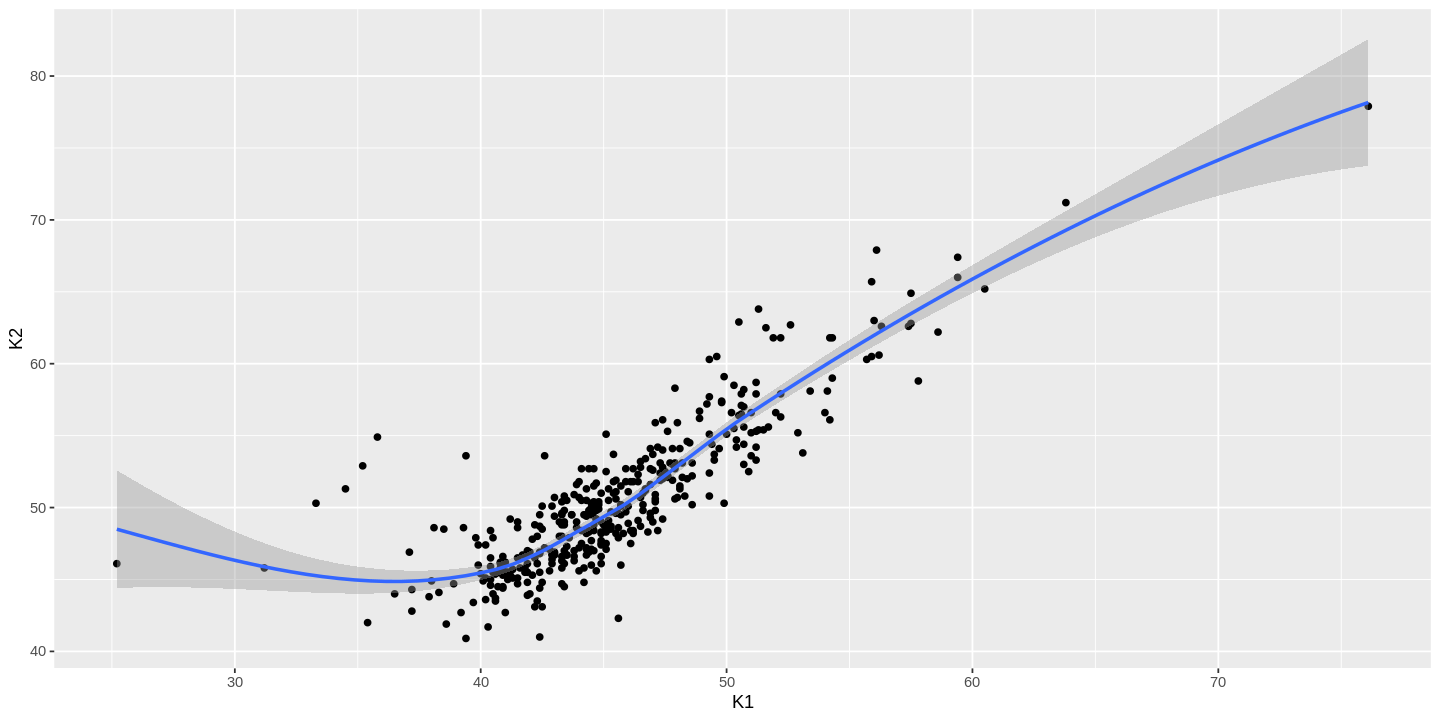

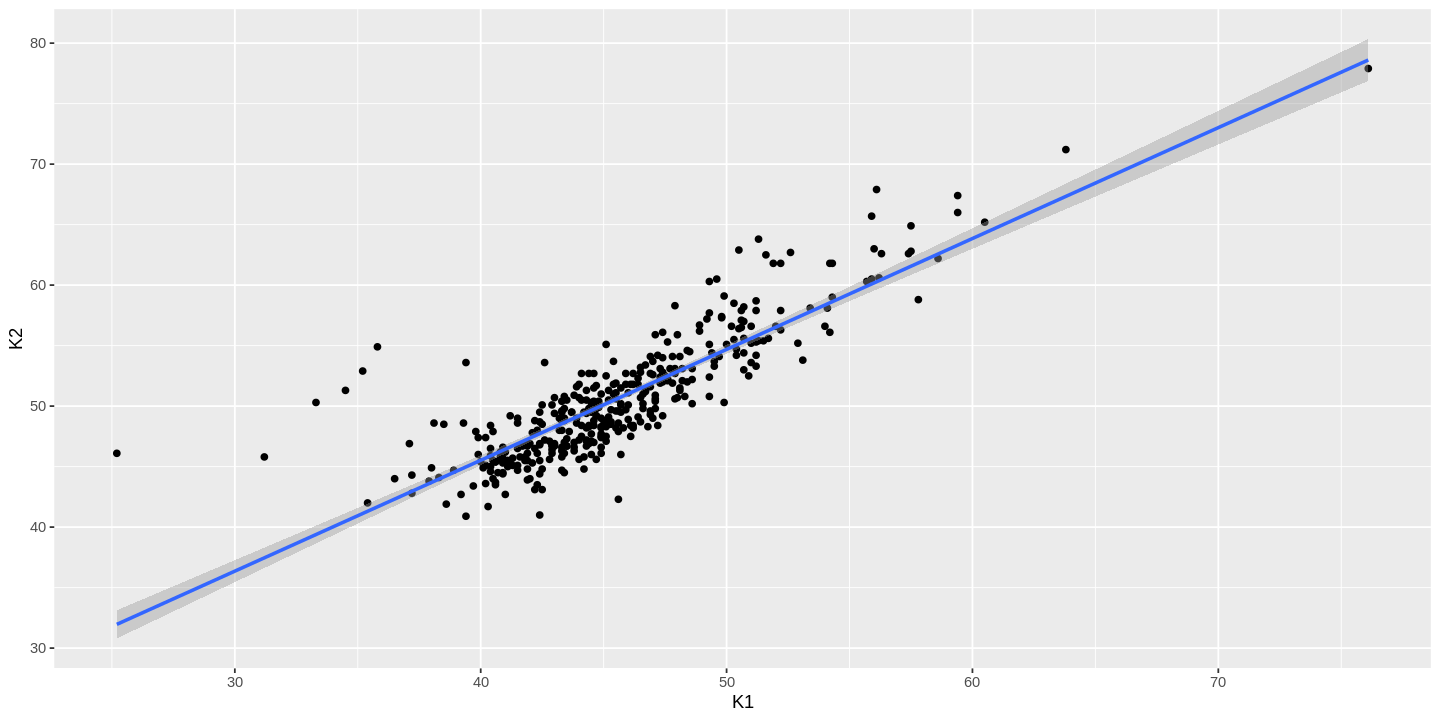

In [11]:
ggplot(data, aes(x = K1, y = K2)) + # sam pusty wykres i do tego dodaje dane
  geom_point() + # scatter plot
  geom_smooth() # linia doposywuje sie sam do danych

ggplot(data, aes(x = K1, y = K2)) +
  geom_point() + # scatter plot
  geom_smooth(method="lm") # wymuszenie liniowego dopasowania

`geom_smooth()` using formula = 'y ~ x'


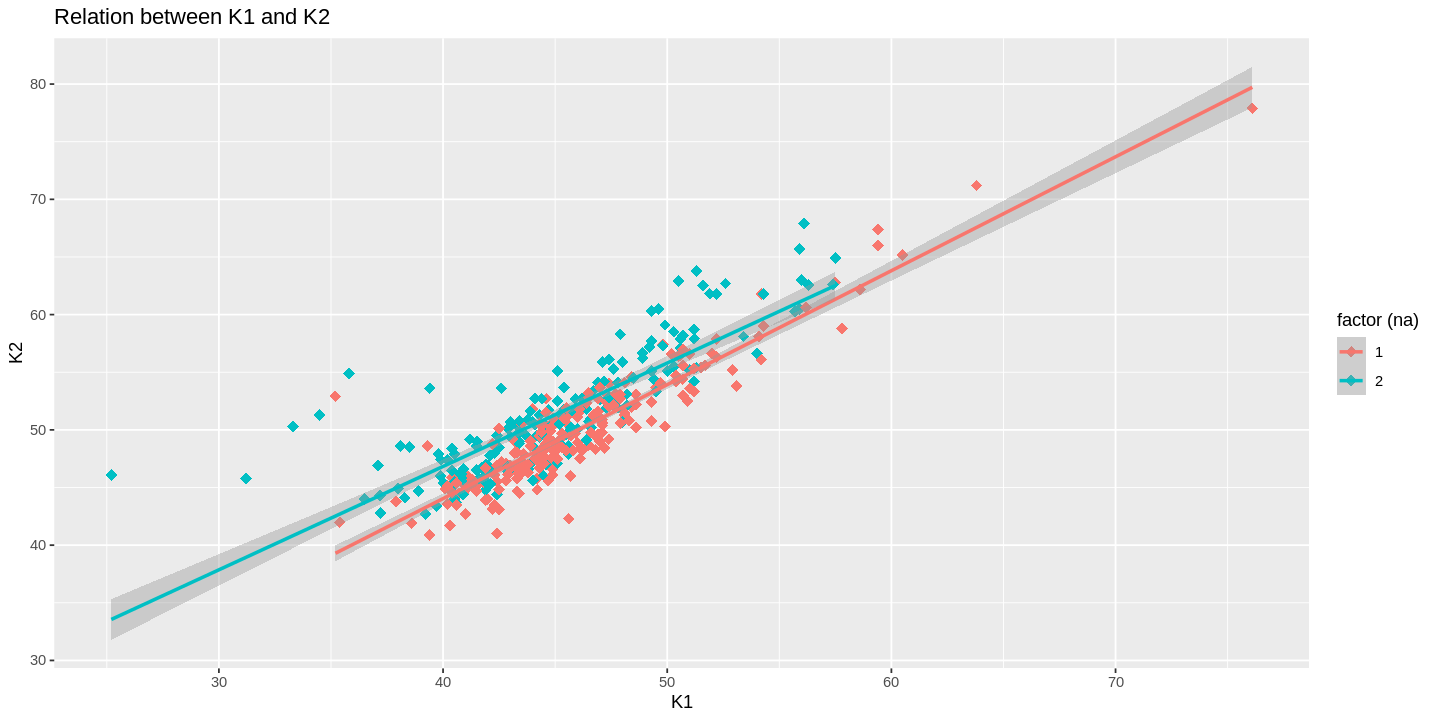

In [12]:
ggplot(data, aes(x = K1, y = K2, color = factor(na)))+ # koloruje po na-nazwa zmiennej, factor dzieli na dwie grupy
     geom_point(shape = 18, size=3) +
     geom_smooth(method="lm") +
     labs(title = "Relation between K1 and K2") +
     scale_color_discrete(name = "factor (na)") # legenda

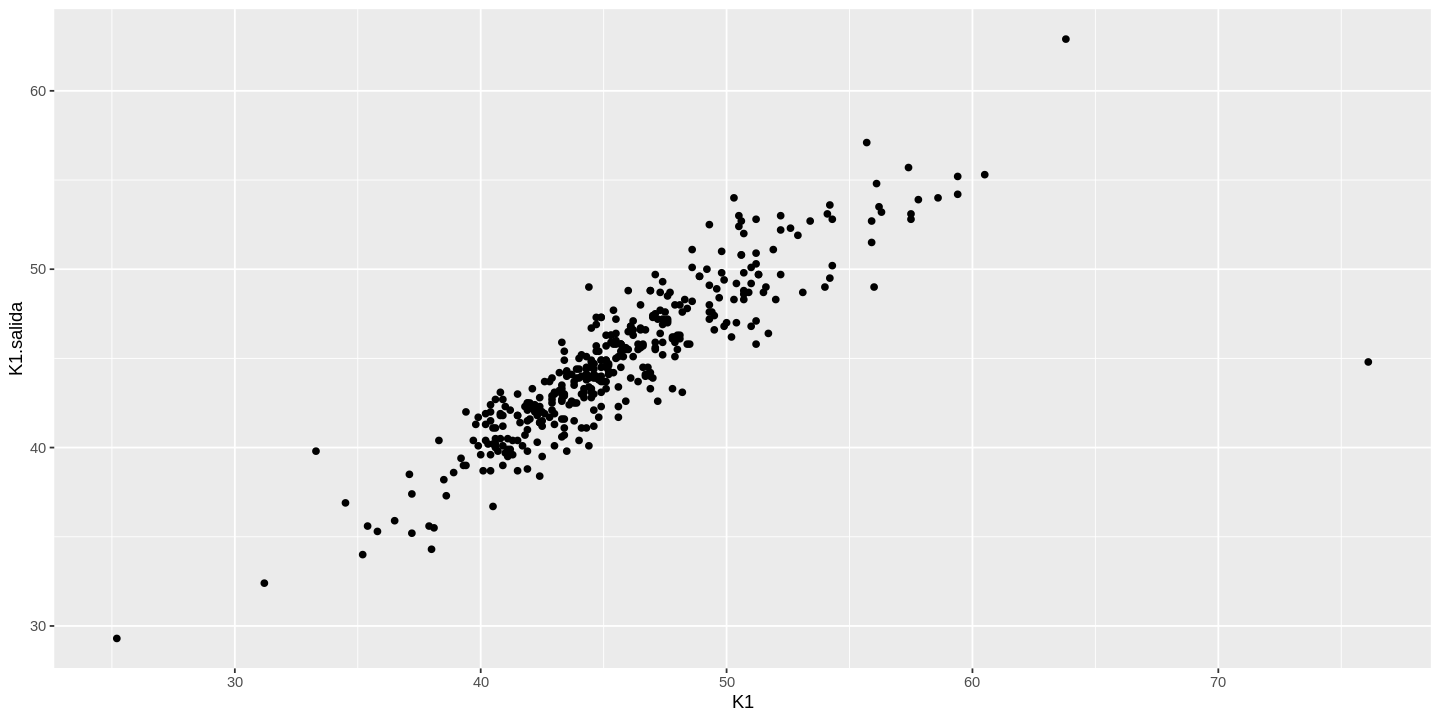

In [13]:
ggplot(data, aes(x = K1, y = K1.salida))+
    geom_point()  # scatter plot


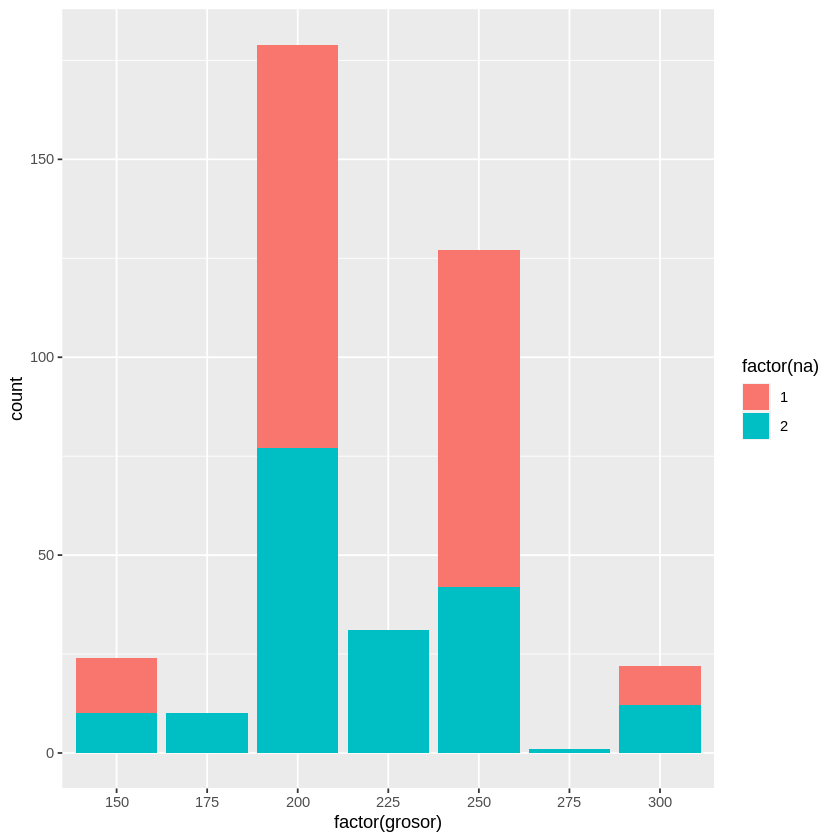

In [5]:
ggplot(data, aes(x = factor(grosor), fill = factor(na))) + # fill że są pokolorowane, a x dzieli na kubełki
  geom_bar() # geom his nie działało

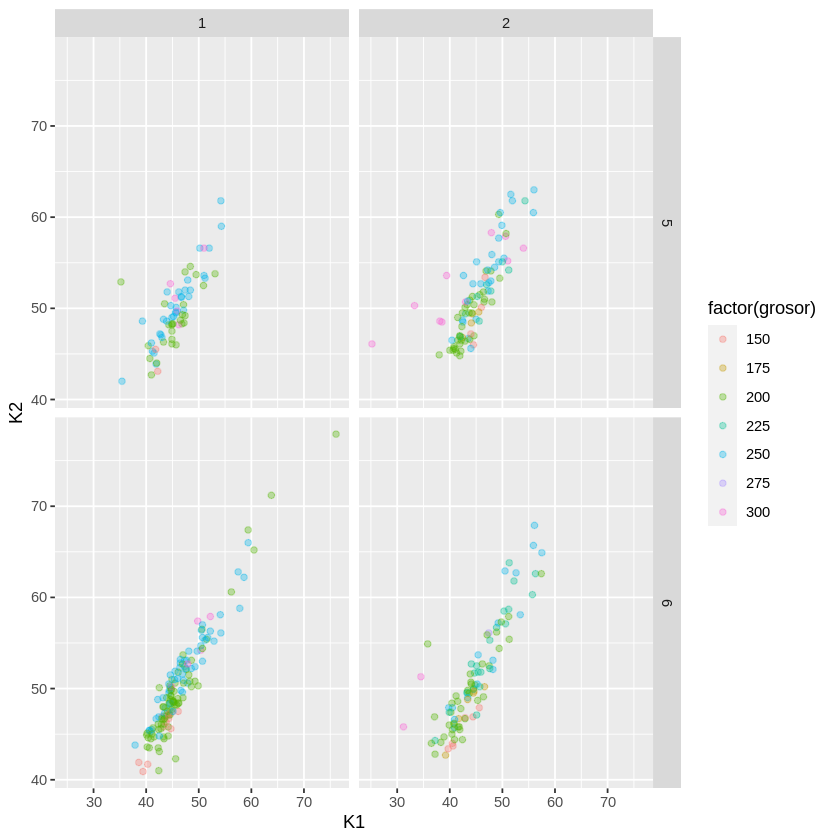

In [6]:
ggplot(data, aes(x = K1, y = K2, color = factor(grosor))) +
  geom_point(alpha = 1/3) + # pół przezroczyste
  facet_grid(diam ~ factor(na)) # dzili nam na 4 wykresiki, factor na ma wartości 1 i 2, a diam to kolumny i miay wartości 5 i 6


In [7]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



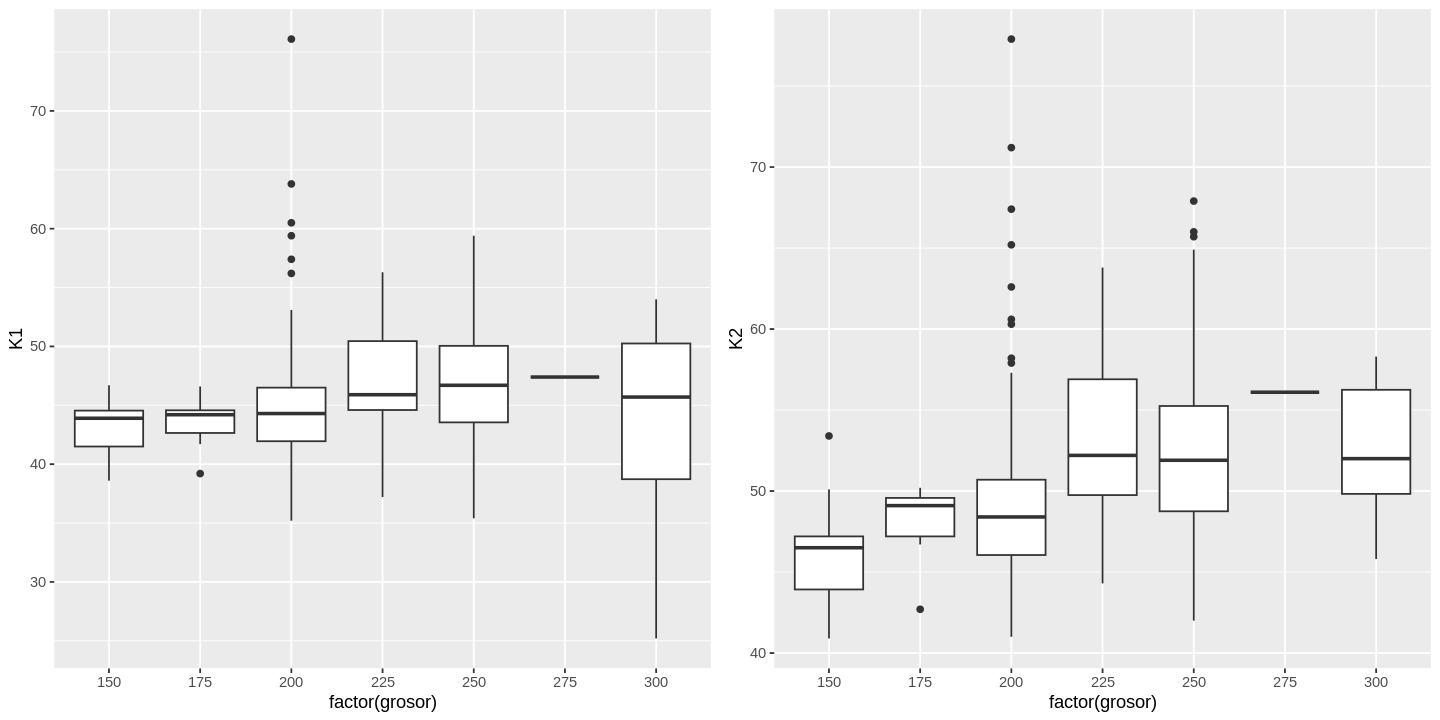

In [8]:
library(gridExtra) # żeby był jeden wykres obok drugiego

options(
  repr.plot.width = 12,  # Adjust the width as needed
  repr.plot.height = 6  # Adjust the height as needed
)


plot_k1 <- ggplot(data, aes(x = factor(grosor), y = K1)) +
  geom_boxplot() # box plot

plot_k2 <- ggplot(data, aes(x = factor(grosor), y = K2)) +
  geom_boxplot()

grid.arrange(plot_k1, plot_k2, ncol = 2) # grid_extra